In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# parse a text file with two columns and return as two numpy arrays
def parse_file(filename):
    data = np.loadtxt(filename)
    x = data[:,0]
    y = data[:,1]
    return x, y
    

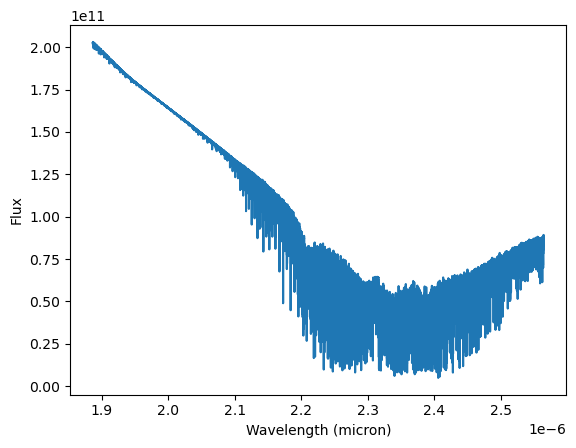

In [7]:
wvs, flux = parse_file('./template_spectra/ch4/model_ugps_t=1600_g=1780.txt')
plt.figure()
plt.plot(wvs, flux)
plt.xlabel('Wavelength (micron)')
plt.ylabel('Flux')
plt.show()
plt.close()